In [1]:
# import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
data = pd.read_csv("historical_data.csv")
data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [3]:
# get a quick information about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [4]:
# getting the null values
data.isnull().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [5]:
# Dropping the null values
data.dropna(inplace=True)

In [6]:
# Converting 'created_at', 'actual_delivery_time' columns into datetime object
data['created_at'] = pd.to_datetime(data['created_at'])
data['actual_delivery_time'] = pd.to_datetime(data['actual_delivery_time'])

In [7]:
# Creating a target variable
data['target'] = (data['actual_delivery_time']-data['created_at']).dt.total_seconds()

In [8]:
data.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,target
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0,1586.0
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,2841,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0,2273.0
15,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,2841,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0,2988.0


In [9]:
data.market_id.value_counts()

2.0    53469
4.0    46222
1.0    37115
3.0    21075
5.0    17258
6.0      638
Name: market_id, dtype: int64

## Exploratory Data Analysis

In [10]:
# get the no. unique values
data.nunique()

market_id                                            6
created_at                                      162649
actual_delivery_time                            160269
store_id                                          5645
store_primary_category                              73
order_protocol                                       7
total_items                                         54
subtotal                                          8182
num_distinct_items                                  20
min_item_price                                    2251
max_item_price                                    2585
total_onshift_dashers                              172
total_busy_dashers                                 158
total_outstanding_orders                           281
estimated_order_place_duration                      94
estimated_store_to_consumer_driving_duration      1318
target                                            6981
dtype: int64

<Axes: xlabel='order_protocol', ylabel='count'>

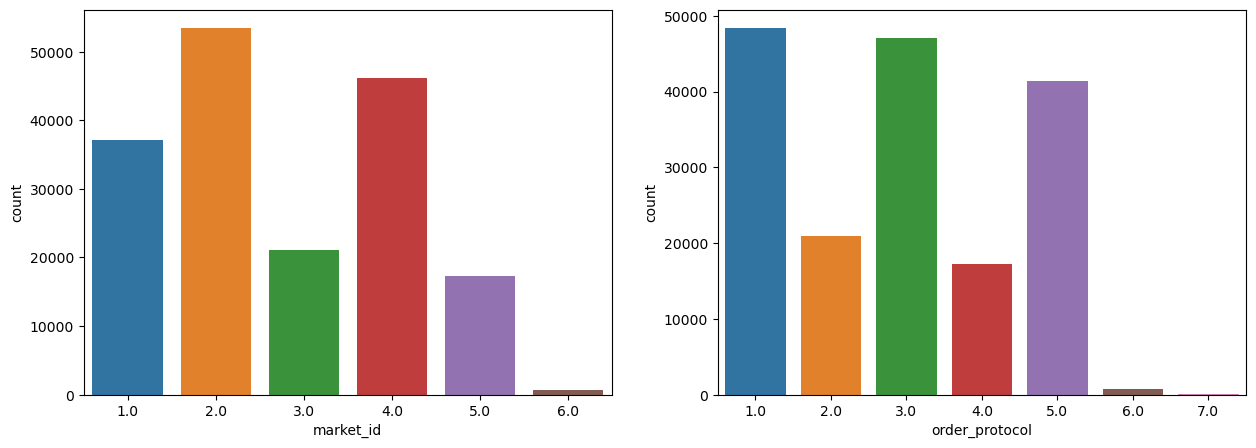

In [11]:
# distribution of categorical variables 
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='market_id',data=data,ax=ax[0])
sns.countplot(x='order_protocol',data=data,ax=ax[1])

[Text(0.5, 1.0, 'Top 10 Category')]

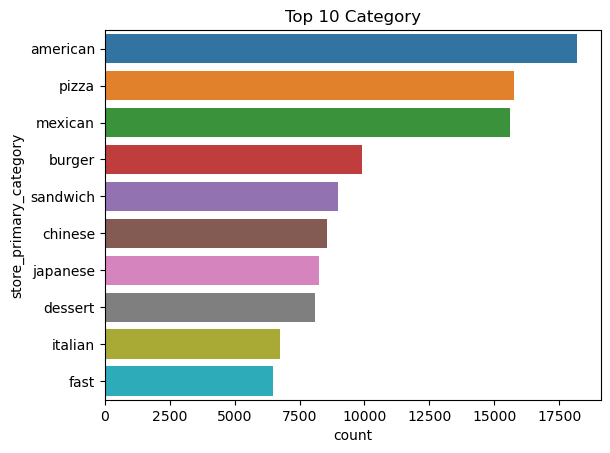

In [12]:
# Top 10 store primary category
sns.countplot(y = data['store_primary_category'],data = data,
              order=data['store_primary_category'].value_counts().iloc[:10].index).set(title='Top 10 Category')

<Axes: xlabel='estimated_store_to_consumer_driving_duration', ylabel='Count'>

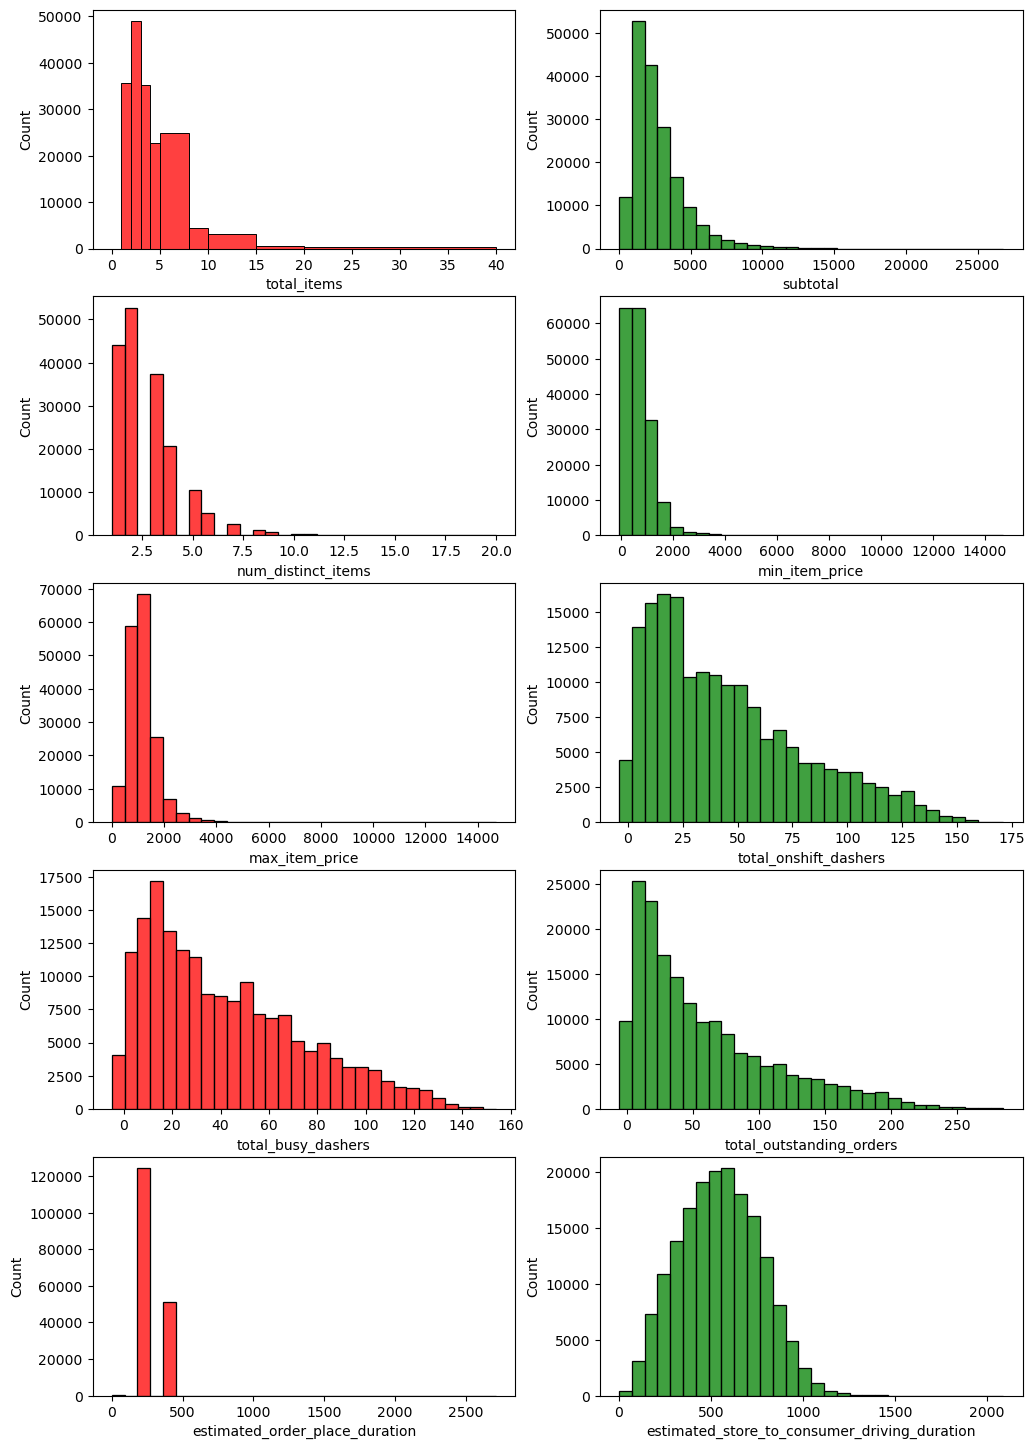

In [13]:
# Distribution of numerical variables
fig,ax = plt.subplots(5,2,figsize=(12,18))
sns.histplot(data=data,x=data['total_items'],color='red',bins=[0,1,2,3,4,5,8,10,15,20,40],ax=ax[0][0])
sns.histplot(data=data,x=data['subtotal'],color='green',bins=30,ax=ax[0][1])
sns.histplot(data=data,x=data['num_distinct_items'],color='red',bins=30,ax=ax[1][0])
sns.histplot(data=data,x=data['min_item_price'],color='green',bins=30,ax=ax[1][1])
sns.histplot(data=data,x=data['max_item_price'],color='red',bins=30,ax=ax[2][0])
sns.histplot(data=data,x=data['total_onshift_dashers'],color='green',bins=30,ax=ax[2][1])
sns.histplot(data=data,x=data['total_busy_dashers'],color='red',bins=30,ax=ax[3][0])
sns.histplot(data=data,x=data['total_outstanding_orders'],color='green',bins=30,ax=ax[3][1])
sns.histplot(data=data,x=data['estimated_order_place_duration'],color='red',bins=30,ax=ax[4][0])
sns.histplot(data=data,x=data['estimated_store_to_consumer_driving_duration'],color='green',bins=30,ax=ax[4][1])

In the above visuals we can conclude most of the distributions are Skewed distributions.

In [14]:
# descripition of target variable
data['target'].describe()

count    175777.000000
mean       2866.422672
std        1660.741001
min         101.000000
25%        2105.000000
50%        2662.000000
75%        3383.000000
max      373879.000000
Name: target, dtype: float64

<Axes: xlabel='target', ylabel='Count'>

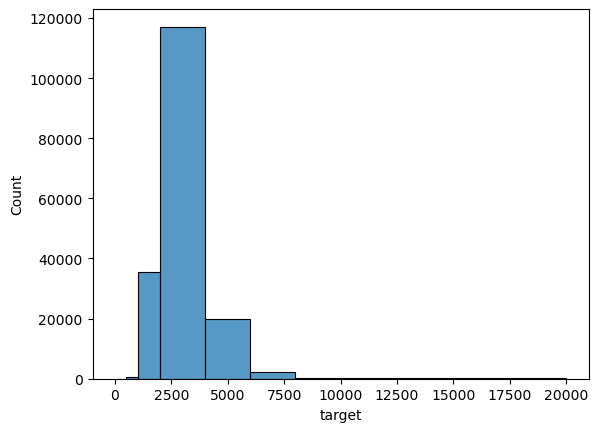

In [15]:
# distribution of target variable 
sns.histplot(data=data,x=data['target'],bins=[1,500,1000,2000,4000,6000,8000,10000,20000])

In [16]:
# description of te dataset
data.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,target
count,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000
mean,2.743726,3556.299561,2.911752,3.204976,2697.111147,2.675060,684.965433,1160.158616,44.918664,41.861381,58.230115,307.818105,546.077240,2866.422672
std,1.330963,2055.959006,1.513128,2.674055,1828.554893,1.625681,519.882924,560.828571,34.544724,32.168505,52.731043,89.796587,218.717798,1660.741001
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000,101.000000
25%,2.000000,1703.000000,1.000000,2.000000,1412.000000,1.000000,299.000000,799.000000,17.000000,15.000000,17.000000,251.000000,384.000000,2105.000000
50%,2.000000,3620.000000,3.000000,3.000000,2224.000000,2.000000,595.000000,1095.000000,37.000000,35.000000,41.000000,251.000000,544.000000,2662.000000
75%,4.000000,5341.000000,4.000000,4.000000,3410.000000,3.000000,942.000000,1395.000000,66.000000,63.000000,85.000000,446.000000,703.000000,3383.000000
max,6.000000,6987.000000,7.000000,411.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000,373879.000000


The above table shows there is negative minimum values in min_item_price,total_onshift_dashers, total_busy_dashers,total_outstanding_orders these columns should not be negative. subtotal,max_item_price,estimated_order_place_duration,estimated_store_to_consumer_driving_duration columns has minimum value of zero so we should remove the outliers.

## Removing the Outliers 

In [17]:
upper = data['min_item_price'].quantile(0.999)
lower = data['min_item_price'].quantile(0.017)
upper,lower

(4248.0, 50.0)

In [18]:
df1 = data[(data['min_item_price']>lower) & (data['min_item_price']<upper)]

In [19]:
upper = df1['total_busy_dashers'].quantile(0.99)
lower = df1['total_busy_dashers'].quantile(0.01)
upper,lower

(126.0, 0.0)

In [20]:
df2 = df1[(df1['total_busy_dashers']>lower) & (df1['total_busy_dashers']<upper)]

In [21]:
upper = df2['subtotal'].quantile(0.9999)
lower = df2['subtotal'].quantile(0.01)
upper,lower

(14929.884999999776, 545.0)

In [22]:
df3 = df2[(df2['subtotal']>lower) & (df2['subtotal']<upper)]

In [23]:
upper = df3['total_onshift_dashers'].quantile(0.999)
lower = df3['total_onshift_dashers'].quantile(0.001)
upper,lower

(151.0, 1.0)

In [24]:
df4 = df3[(df3['total_onshift_dashers']>lower) & (df3['total_onshift_dashers']<upper)]

In [25]:
upper = df4['total_outstanding_orders'].quantile(0.999)
lower = df4['total_outstanding_orders'].quantile(0.001)
upper,lower

(236.0, 0.0)

In [26]:
df5 = df4[(df4['total_outstanding_orders']>lower) & (df4['total_outstanding_orders']<upper)]

In [27]:
upper = df5['estimated_order_place_duration'].quantile(1)
lower = df5['estimated_order_place_duration'].quantile(0.0005)
upper,lower

(2715.0, 58.41250000000004)

In [28]:
df6 = df5[(df5['estimated_order_place_duration']>lower) & (df5['estimated_order_place_duration']<upper)]

In [29]:
upper = df6['estimated_store_to_consumer_driving_duration'].quantile(0.9999)
lower = df6['estimated_store_to_consumer_driving_duration'].quantile(0.01)
upper,lower

(1405.8953999999212, 111.0)

In [30]:
df7 = df6[(df6['estimated_store_to_consumer_driving_duration']>lower) & (df6['estimated_store_to_consumer_driving_duration']<upper)]

In [31]:
upper = df7['target'].quantile(0.9999)
lower = df7['target'].quantile(0.001)
upper,lower

(22876.877499997237, 859.0)

In [32]:
df8 = df7[(df7['target']>lower) & (df7['target']<upper)]

## Feature Selection

### Using Correlation

<Axes: >

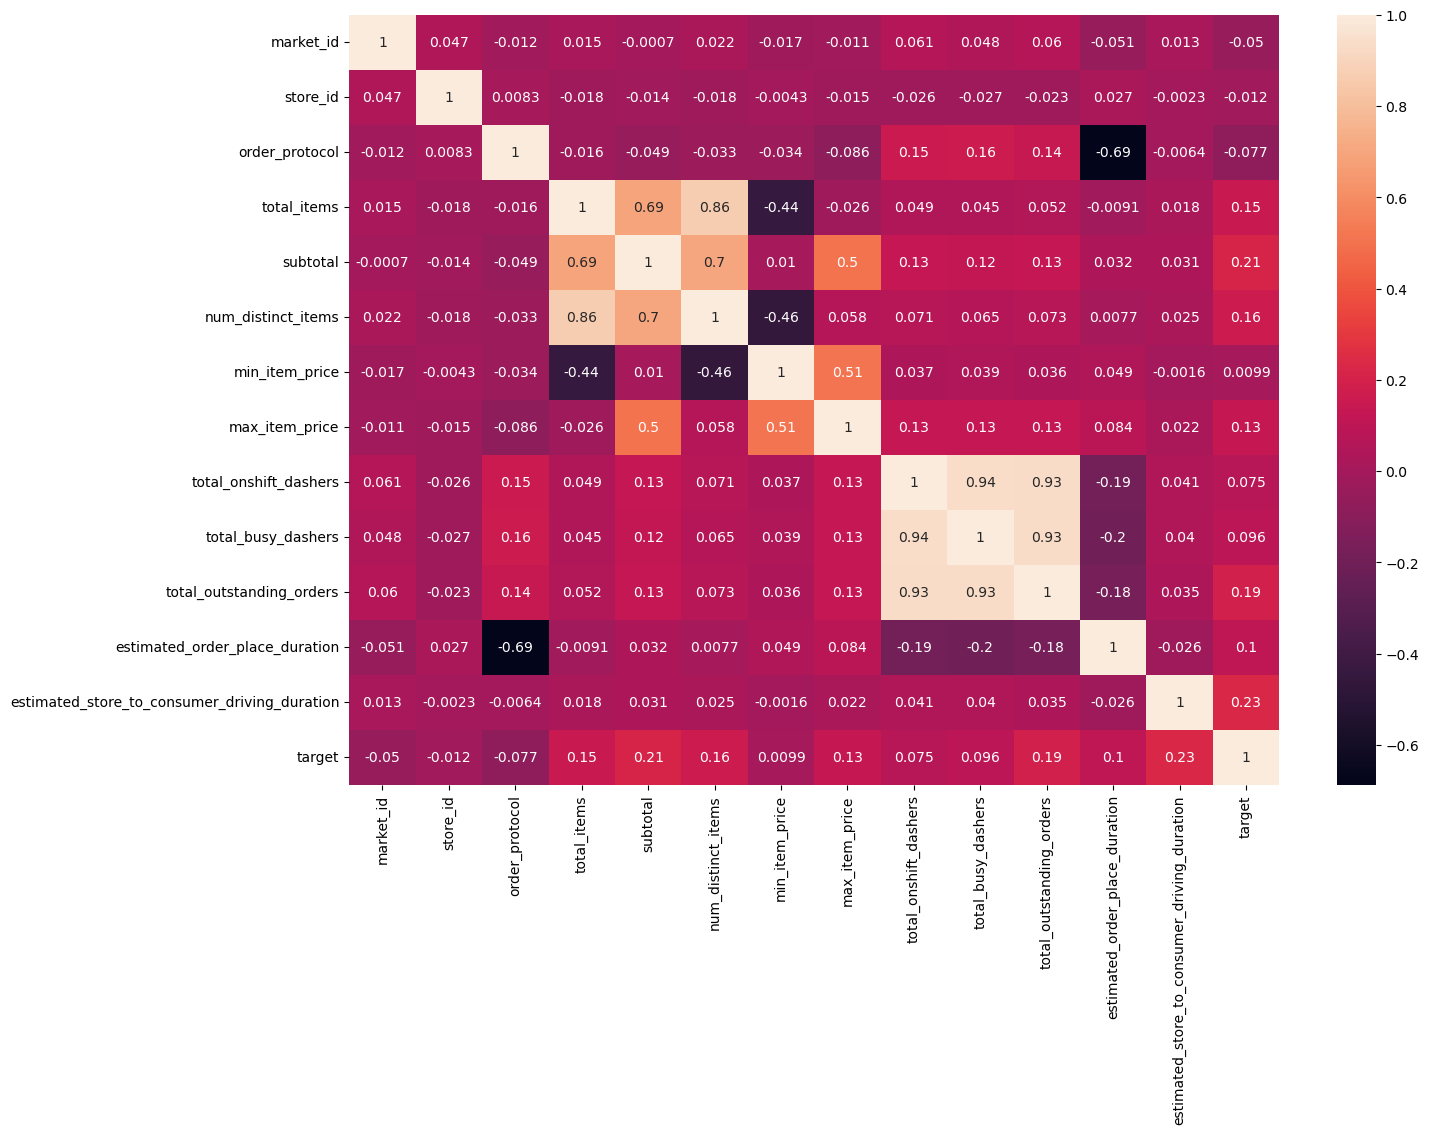

In [33]:
# Correlation heatmap 
plt.figure(figsize=(15,10))
sns.heatmap(df8.corr(),annot=True)

In [34]:
# Feature Selection by correlation 
def correlation(data,threshold):
    col = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col.add(colname)
    return col           

In [35]:
col = list(correlation(df8,0.8))

In [36]:
# Dropping the columns of same correlation
df8.drop(columns=col,axis=1,inplace=True)

<Axes: xlabel='target', ylabel='estimated_store_to_consumer_driving_duration'>

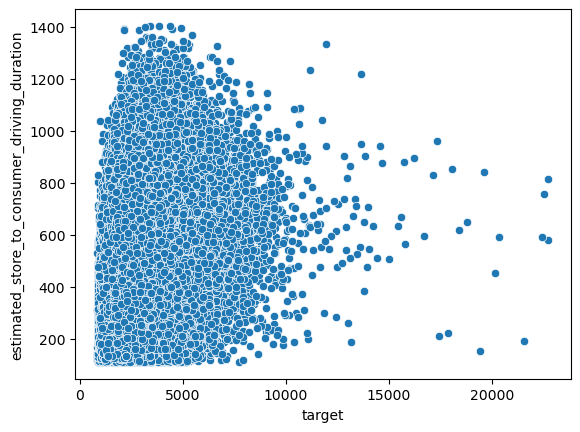

In [37]:
# Scatterplot of target and estimated_store_to_consumer_driving_duration
sns.scatterplot(x=df8.target,y=df8.estimated_store_to_consumer_driving_duration,data=df8)

## Data Preprocessing

In [47]:
df8

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,min_item_price,max_item_price,total_onshift_dashers,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,target
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,557,1239,33.0,446,861.0,3779.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,820,1604,8.0,446,289.0,1586.0
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,2841,italian,1.0,1,1525,1525,1525,5.0,446,795.0,2273.0
15,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,2841,italian,1.0,2,3620,1425,2195,5.0,446,205.0,2988.0
16,1.0,2015-02-06 00:42:42,2015-02-06 02:10:29,2841,italian,1.0,3,4475,925,1825,4.0,446,542.0,5267.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,345,649,17.0,251,331.0,3907.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,405,825,12.0,251,915.0,3383.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,300,399,39.0,251,795.0,3008.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,535,535,7.0,446,384.0,3907.0


In [44]:
dummies = pd.get_dummies(df8.store_primary_category,drop_first=True)

In [52]:
final_data = pd.concat([df8,dummies],axis=1)

In [56]:
# Dropping the date and time, store_primary_category columns
final_data.drop(columns=['created_at','actual_delivery_time','store_primary_category'],axis=1,inplace=True)

In [63]:
final_data

,market_id,store_id,order_protocol,total_items,subtotal,min_item_price,max_item_price,total_onshift_dashers,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,southern,spanish,steak,sushi,tapas,thai,turkish,vegan,vegetarian,vietnamese
0,1.0,1845,1.0,4,3441,557,1239,33.0,446,861.0,...,0,0,0,0,0,0,0,0,0,0
8,2.0,5477,3.0,4,4771,820,1604,8.0,446,289.0,...,0,0,0,0,0,0,0,0,0,0
14,1.0,2841,1.0,1,1525,1525,1525,5.0,446,795.0,...,0,0,0,0,0,0,0,0,0,0
15,1.0,2841,1.0,2,3620,1425,2195,5.0,446,205.0,...,0,0,0,0,0,0,0,0,0,0
16,1.0,2841,1.0,3,4475,925,1825,4.0,446,542.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2956,4.0,3,1389,345,649,17.0,251,331.0,...,0,0,0,0,0,0,0,0,0,0
197424,1.0,2956,4.0,6,3010,405,825,12.0,251,915.0,...,0,0,0,0,0,0,0,0,0,0
197425,1.0,2956,4.0,5,1836,300,399,39.0,251,795.0,...,0,0,0,0,0,0,0,0,0,0
197426,1.0,3630,1.0,1,1175,535,535,7.0,446,384.0,...,0,0,0,0,0,0,0,0,0,0


## Model Creation

### Train Test Split

In [67]:
x = final_data.drop('target',axis=1)
y = final_data['target']

In [69]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

 ### 1) Decision Tree

In [71]:
from sklearn.tree import DecisionTreeRegressor
Dtree = DecisionTreeRegressor()

In [72]:
# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV 

In [73]:
# Parameters for grid search cv
params = {
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,10],
    'random_state':[0,42],
    'min_samples_split':[2,4,6,8]
}

In [74]:
cv = GridSearchCV(estimator=Dtree,param_grid=params,verbose=2,cv=5,scoring='neg_mean_squared_error')
cv.fit(x_train,y_train)
cv.best_params_

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, random_state=0; total time=   6.6s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, random_state=0; total time=   1.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, random_state=0; total time=   0.8s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, random_state=0; total time=   1.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, random_state=0; total time=   1.2s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, random_state=42; total time=   2.2s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, random_state=42; total time=   1.4s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, random_state=42; total time=   1.4s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, random_state=42; total time=   1.3s
[CV] END max_depth=2, min_samples_leaf=2, min_sampl

[CV] END max_depth=2, min_samples_leaf=6, min_samples_split=2, random_state=0; total time=   0.9s
[CV] END max_depth=2, min_samples_leaf=6, min_samples_split=2, random_state=0; total time=   1.0s
[CV] END max_depth=2, min_samples_leaf=6, min_samples_split=2, random_state=42; total time=   0.7s
[CV] END max_depth=2, min_samples_leaf=6, min_samples_split=2, random_state=42; total time=   0.7s
[CV] END max_depth=2, min_samples_leaf=6, min_samples_split=2, random_state=42; total time=   0.7s
[CV] END max_depth=2, min_samples_leaf=6, min_samples_split=2, random_state=42; total time=   0.7s
[CV] END max_depth=2, min_samples_leaf=6, min_samples_split=2, random_state=42; total time=   0.8s
[CV] END max_depth=2, min_samples_leaf=6, min_samples_split=4, random_state=0; total time=   0.6s
[CV] END max_depth=2, min_samples_leaf=6, min_samples_split=4, random_state=0; total time=   0.9s
[CV] END max_depth=2, min_samples_leaf=6, min_samples_split=4, random_state=0; total time=   1.2s
[CV] END max_de

[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=2, random_state=42; total time=   1.6s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=2, random_state=42; total time=   3.2s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=2, random_state=42; total time=   2.2s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=2, random_state=42; total time=   3.4s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=4, random_state=0; total time=   2.9s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=4, random_state=0; total time=   4.7s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=4, random_state=0; total time=   2.5s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=4, random_state=0; total time=   3.6s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=4, random_state=0; total time=   4.7s
[CV] END max_depth=4, min_samples_leaf=2, min_samples_split=4, random_state=42; total time=   3.6s
[CV] END max_de

[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=4, random_state=0; total time=   1.9s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=4, random_state=0; total time=   1.5s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=4, random_state=0; total time=   1.6s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=4, random_state=0; total time=   1.5s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=4, random_state=0; total time=   1.6s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=4, random_state=42; total time=   1.5s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=4, random_state=42; total time=   1.8s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=4, random_state=42; total time=   1.3s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=4, random_state=42; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=6, min_samples_split=4, random_state=42; total time=   1.4s
[CV] END max_de

[CV] END max_depth=6, min_samples_leaf=2, min_samples_split=4, random_state=0; total time=   2.3s
[CV] END max_depth=6, min_samples_leaf=2, min_samples_split=4, random_state=0; total time=   2.0s
[CV] END max_depth=6, min_samples_leaf=2, min_samples_split=4, random_state=42; total time=   2.0s
[CV] END max_depth=6, min_samples_leaf=2, min_samples_split=4, random_state=42; total time=   1.9s
[CV] END max_depth=6, min_samples_leaf=2, min_samples_split=4, random_state=42; total time=   2.0s
[CV] END max_depth=6, min_samples_leaf=2, min_samples_split=4, random_state=42; total time=   2.3s
[CV] END max_depth=6, min_samples_leaf=2, min_samples_split=4, random_state=42; total time=   1.7s
[CV] END max_depth=6, min_samples_leaf=2, min_samples_split=6, random_state=0; total time=   1.9s
[CV] END max_depth=6, min_samples_leaf=2, min_samples_split=6, random_state=0; total time=   2.1s
[CV] END max_depth=6, min_samples_leaf=2, min_samples_split=6, random_state=0; total time=   1.9s
[CV] END max_de

[CV] END max_depth=6, min_samples_leaf=6, min_samples_split=4, random_state=42; total time=   2.1s
[CV] END max_depth=6, min_samples_leaf=6, min_samples_split=4, random_state=42; total time=   1.9s
[CV] END max_depth=6, min_samples_leaf=6, min_samples_split=4, random_state=42; total time=   2.1s
[CV] END max_depth=6, min_samples_leaf=6, min_samples_split=6, random_state=0; total time=   1.8s
[CV] END max_depth=6, min_samples_leaf=6, min_samples_split=6, random_state=0; total time=   2.0s
[CV] END max_depth=6, min_samples_leaf=6, min_samples_split=6, random_state=0; total time=   2.1s
[CV] END max_depth=6, min_samples_leaf=6, min_samples_split=6, random_state=0; total time=   1.9s
[CV] END max_depth=6, min_samples_leaf=6, min_samples_split=6, random_state=0; total time=   2.1s
[CV] END max_depth=6, min_samples_leaf=6, min_samples_split=6, random_state=42; total time=   1.8s
[CV] END max_depth=6, min_samples_leaf=6, min_samples_split=6, random_state=42; total time=   1.6s
[CV] END max_de

[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=6, random_state=0; total time=   2.5s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=6, random_state=0; total time=   2.5s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=6, random_state=0; total time=   3.7s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=6, random_state=0; total time=   7.7s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=6, random_state=0; total time=   8.8s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=6, random_state=42; total time=  12.5s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=6, random_state=42; total time=  15.8s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=6, random_state=42; total time=   6.1s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=6, random_state=42; total time=   6.2s
[CV] END max_depth=8, min_samples_leaf=2, min_samples_split=6, random_state=42; total time=   3.4s
[CV] END max_de

[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=6, random_state=0; total time=   4.5s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=6, random_state=42; total time=   4.8s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=6, random_state=42; total time=   5.1s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=6, random_state=42; total time=   7.5s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=6, random_state=42; total time=   8.2s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=6, random_state=42; total time=   3.9s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=8, random_state=0; total time=   5.7s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=8, random_state=0; total time=   5.4s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=8, random_state=0; total time=   4.2s
[CV] END max_depth=8, min_samples_leaf=6, min_samples_split=8, random_state=0; total time=   2.7s
[CV] END max_de

{'max_depth': 8,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'random_state': 0}

In [75]:
Dtree = DecisionTreeRegressor(max_depth=8,min_samples_leaf=10, min_samples_split=2, random_state=0)
Dtree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=10, random_state=0)

In [76]:
Dtree.score(x_train,y_train)

0.1457157284329086